For best experience:
- Run this code as an interactive web app on binder
[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gl/speech-interaction-technology-aalto-university%2Fspeech-processing-experiments/HEAD?labpath=Sampling_and_quantization.ipynb)
- Run Voila by clicking the logo 



# Sampling and quantization

Listen to the audio example below to experience how changing the sampling frequency changes the sound. The original is wavefile stored as 16bit signed integers. You can also change the accuracy of the bit representation to hear how that changes quality.

In [1]:
from ipywidgets import *
import IPython.display as ipd
import numpy as np
import scipy
from scipy.io import wavfile
from scipy import signal
import matplotlib.pyplot as plt
%matplotlib inline

filename = 'test.wav'
fs, data = wavfile.read(filename)
data = data.astype(np.int16)

## Original

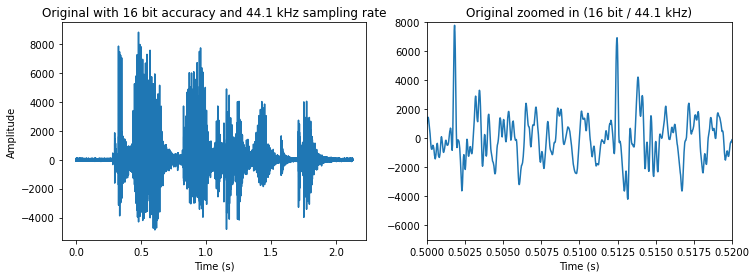

In [2]:
fig = plt.figure(figsize=(12, 4))
ax = fig.subplots(nrows=1,ncols=2)
t = np.arange(0.,len(data))/fs
ax[0].plot(t,data)
ax[0].set_title('Original with 16 bit accuracy and ' + str(fs/1000) + ' kHz sampling rate')
ax[1].plot(t,data)
ax[1].set_title('Original zoomed in (16 bit / ' + str(fs/1000) + ' kHz)')
ax[1].set(xlim=(0.5,0.52),ylim=(-7000,8000))
ax[0].set_xlabel('Time (s)')
ax[1].set_xlabel('Time (s)')
ax[0].set_ylabel('Amplitude')
plt.show()

import IPython.display as ipd
ipd.display(ipd.Audio(filename))

## Re-sampled and re-quantized

In [3]:
def update(sampling_rate=16000, bits=8):
    ipd.clear_output(wait=True)
    resample_ratio = sampling_rate/fs
    data_resample = signal.resample(data, int(len(data)*resample_ratio))
    data_resample = signal.resample(data_resample, len(data))
    data_resample = (data_resample*.7*(2**14)/np.max(np.abs(data_resample))).astype(np.int16)
    qstep = 2**(16-bits)
    data_q = qstep*np.round(data_resample / qstep)
    t = np.arange(0.,len(data_q))/fs
    fig = plt.figure(figsize=(12, 4))
    ax = fig.subplots(nrows=1,ncols=2)
    ax[0].plot(t,data_q)
    ax[0].set_title(str(bits)+' bit accuracy and ' + str(sampling_rate/1000) + ' kHz sampling rate')
    ax[1].plot(t,data_q)
    ax[1].set_title('Zoom in with '+str(bits)+' bit / ' + str(sampling_rate/1000) + ' kHz')
    ax[1].set(xlim=(0.5,0.52),ylim=(-7000,8000))
    ax[0].set_xlabel('Time (s)')
    ax[1].set_xlabel('Time (s)')
    ax[0].set_ylabel('Amplitude')
    plt.show()
    fig.canvas.draw()
    wavfile.write("temp.wav", fs, data_q.astype(np.int16))
    
    ipd.display(ipd.Audio('temp.wav'))
    
    


interact(update, sampling_rate=(2000, fs, 500), bits=(1,16,1));

interactive(children=(IntSlider(value=16000, description='sampling_rate', max=44100, min=2000, step=500), IntS…